# Comparison of infoplanes for different estimators


In [1]:
import sys
sys.path.append('../..')
from deep_bottleneck.eval_tools.experiment_loader import ExperimentLoader
from deep_bottleneck.eval_tools.utils import format_config, find_differing_config_keys
import matplotlib.pyplot as plt
from io import BytesIO

In [2]:
loader = ExperimentLoader()

In [5]:
import numpy as np
import pandas as pd

all_experiments = [[1318,1328,1327,1320,1333,1315,1325,1319,1321,1323], # binning tanh
                  [1326,1329,1316,1330,1331,1317,1332,1334,1324,1322], # binning relu
                  [1368,1369,1370,1371,1372,1375,1373,1374,1376,1377], # kde tanh
                  [1354,1358,1359,1361,1362,1363,1364,1365,1367,1366], # kde relu
                  [1454,1441,1451,1453,1455,1448,1459,1442,1458,1447], # EDGE tanh
                  [1452,1445,1446,1440,1449,1443,1444,1457,1450,1456]  # EDGE relu
                ]

label_list = ['Estimator: binning, Activation function: tanh',
             'Estimator: binning, Activation function: relu',
             'Estimator: KDE, Activation function: tanh',
             'Estimator: KDE, Activation function: relu',
             'Estimator: EDGE, Activation function: tanh',
             'Estimator: EDGE, Activation function: relu',
             ]

all_means = []
for experiment_set in all_experiments:
    experiments = loader.find_by_ids(experiment_set)
    set_df = []
    for i, experiment in enumerate(experiments):
        infoplane = experiment.artifacts['information_measures_test'].show()
        set_df.append(infoplane)

    df_concat = pd.concat(set_df)

    by_row_index = df_concat.groupby(df_concat.index)
    set_mean = by_row_index.mean()

    all_means.append(set_mean)

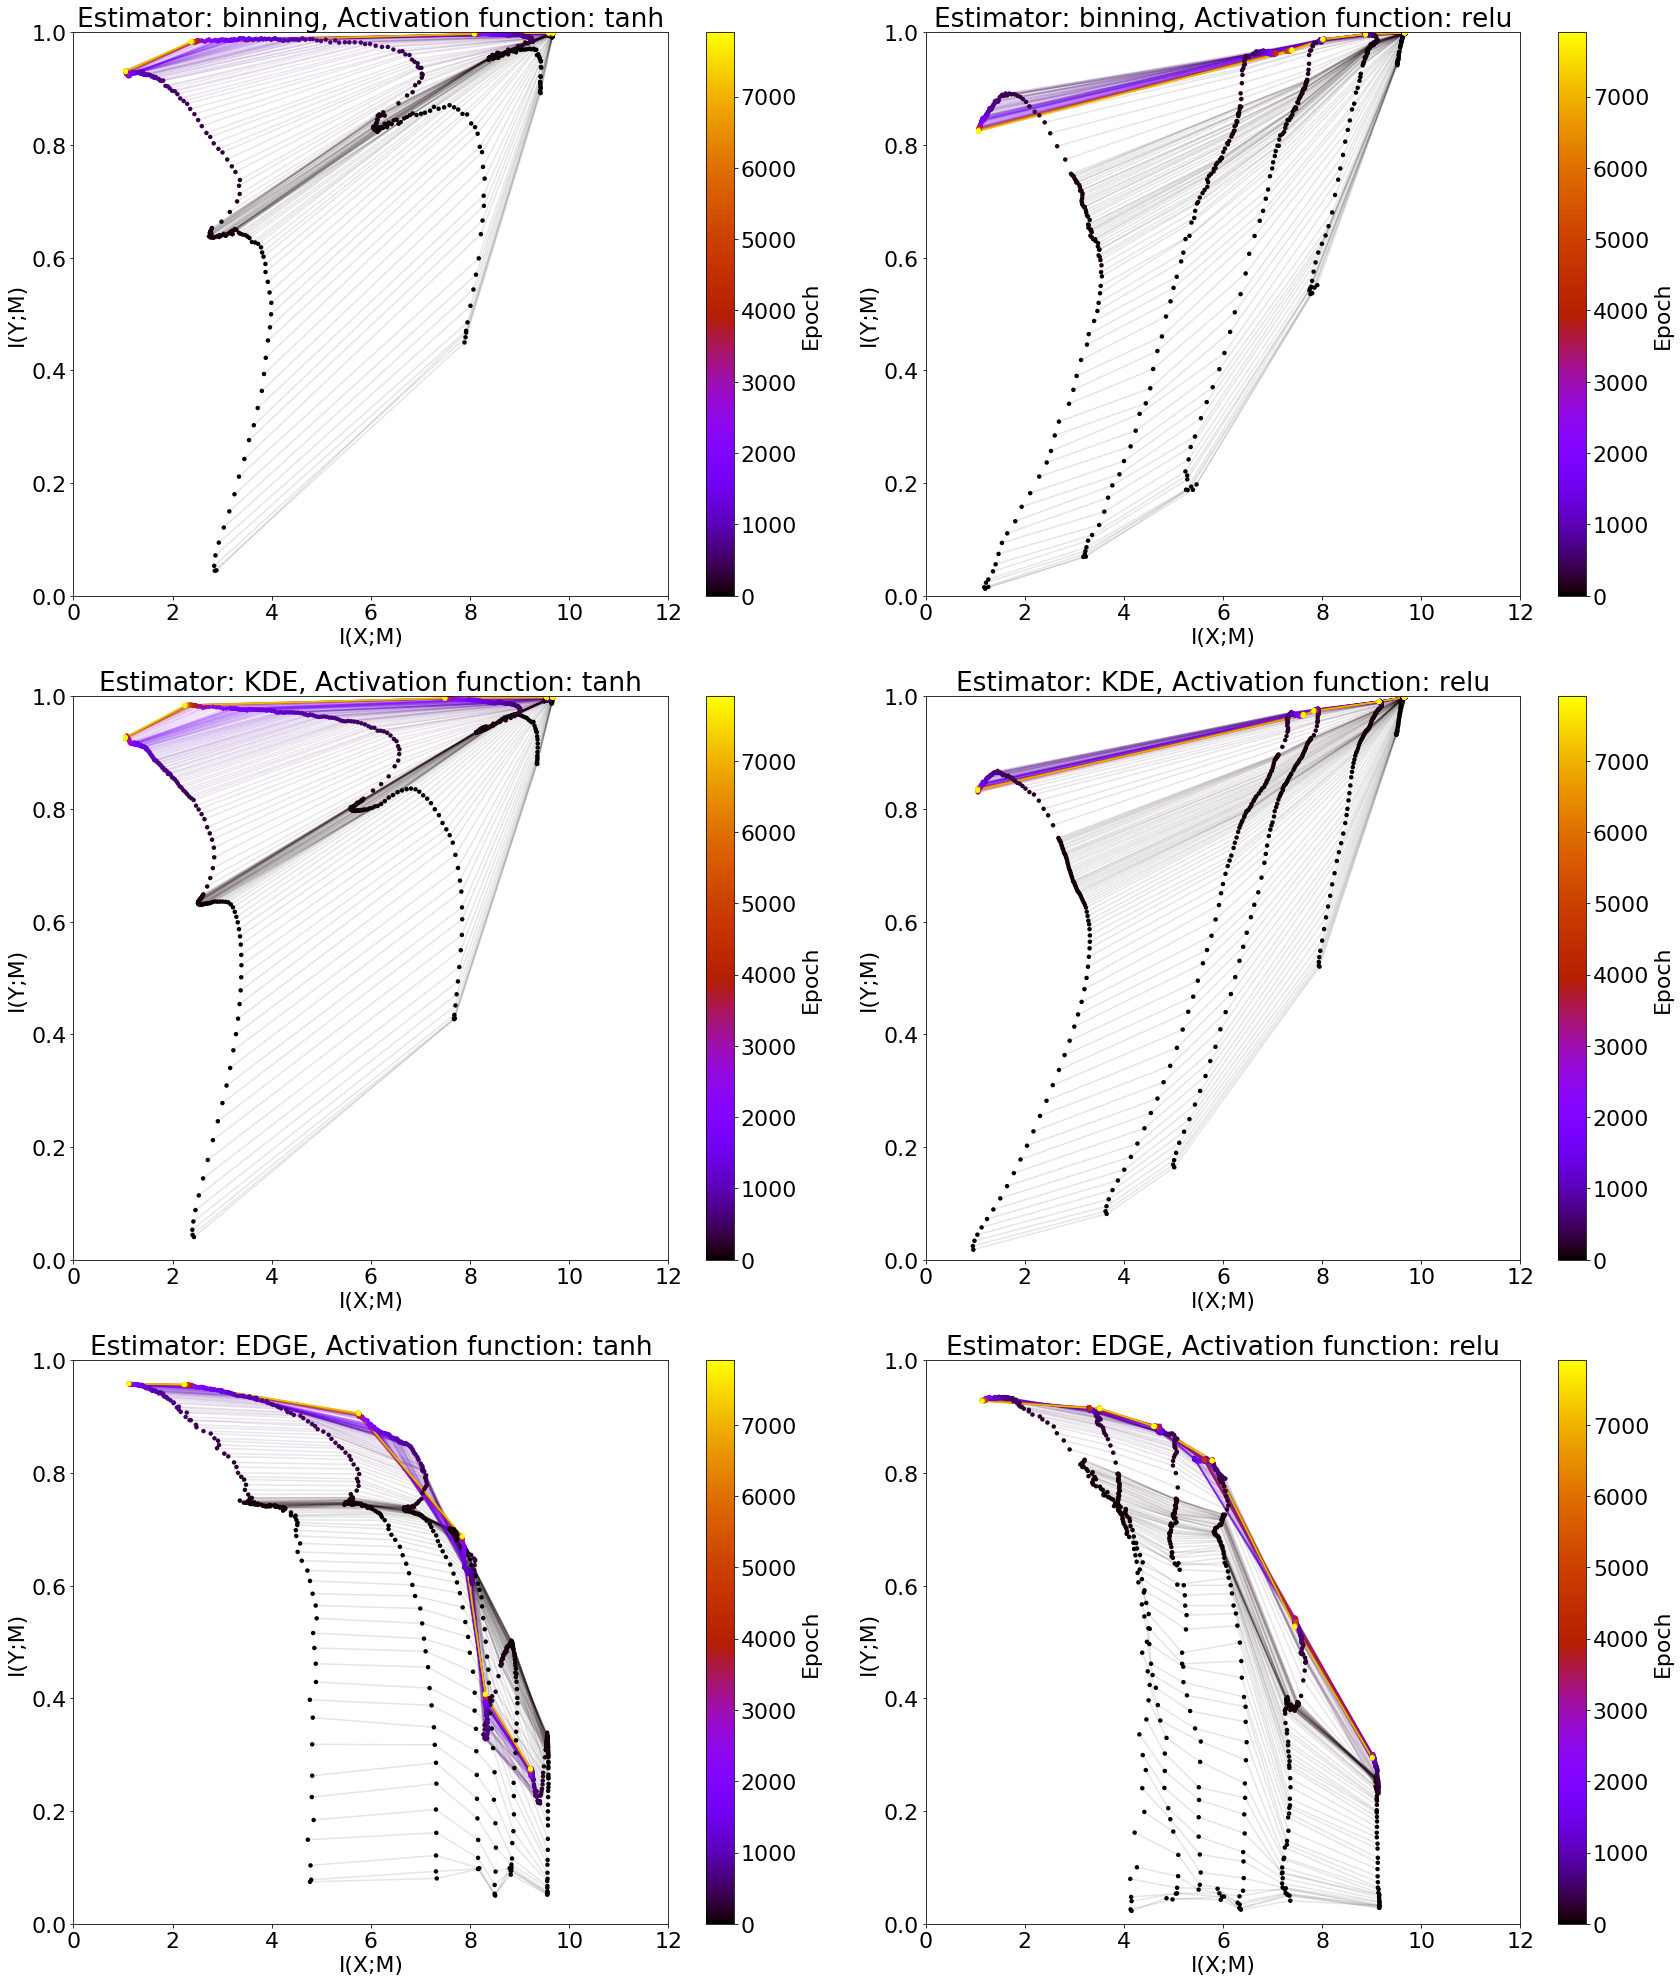

In [6]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(24,28))

for ax_id, set_mean in enumerate(all_means):

    plt.subplot(3,2,ax_id+1)
    measures = set_mean.groupby(['epoch', 'layer']).mean()

    total_epochs = measures.index.get_level_values('epoch')[-1] + 1  # epoch index starts at 0
    sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=0, vmax=total_epochs))
    sm.set_array([])

    for epoch_nr, mi_measures in measures.groupby(level=0):
        color = sm.to_rgba(epoch_nr)

        xmvals = np.array(mi_measures['MI_XM'])
        ymvals = np.array(mi_measures['MI_YM'])

        plt.plot(xmvals, ymvals, color=color, alpha=0.1, zorder=1)
        plt.scatter(xmvals, ymvals, s=20, facecolors=color, edgecolor='none', zorder=2)

        plt.title(label_list[ax_id])
        plt.xlabel('I(X;M)')
        plt.ylabel('I(Y;M)')
        plt.xlim([0, 12])
        plt.ylim([0, 1])

    fig.colorbar(sm, label='Epoch')

plt.tight_layout()
plt.show()

# EDGE individiual runs

In [17]:
fig, ax = plt.subplots(5,2, figsize = (20,50))
ax = ax.flat
experiment_ids = [1345,1344,1346,1352,1351,1348,1347,1353,1350,1349]

experiments = loader.find_by_ids(experiment_ids)
differing_config_keys = find_differing_config_keys(experiments)

for i, experiment in enumerate(experiments):
    img = plt.imread(BytesIO(experiment.artifacts['infoplane_train'].content))
    ax[i].axis('off')
    ax[i].imshow(img)
    ax[i].set_title(format_config(experiment.config, *differing_config_keys),
                    fontsize=20)
    

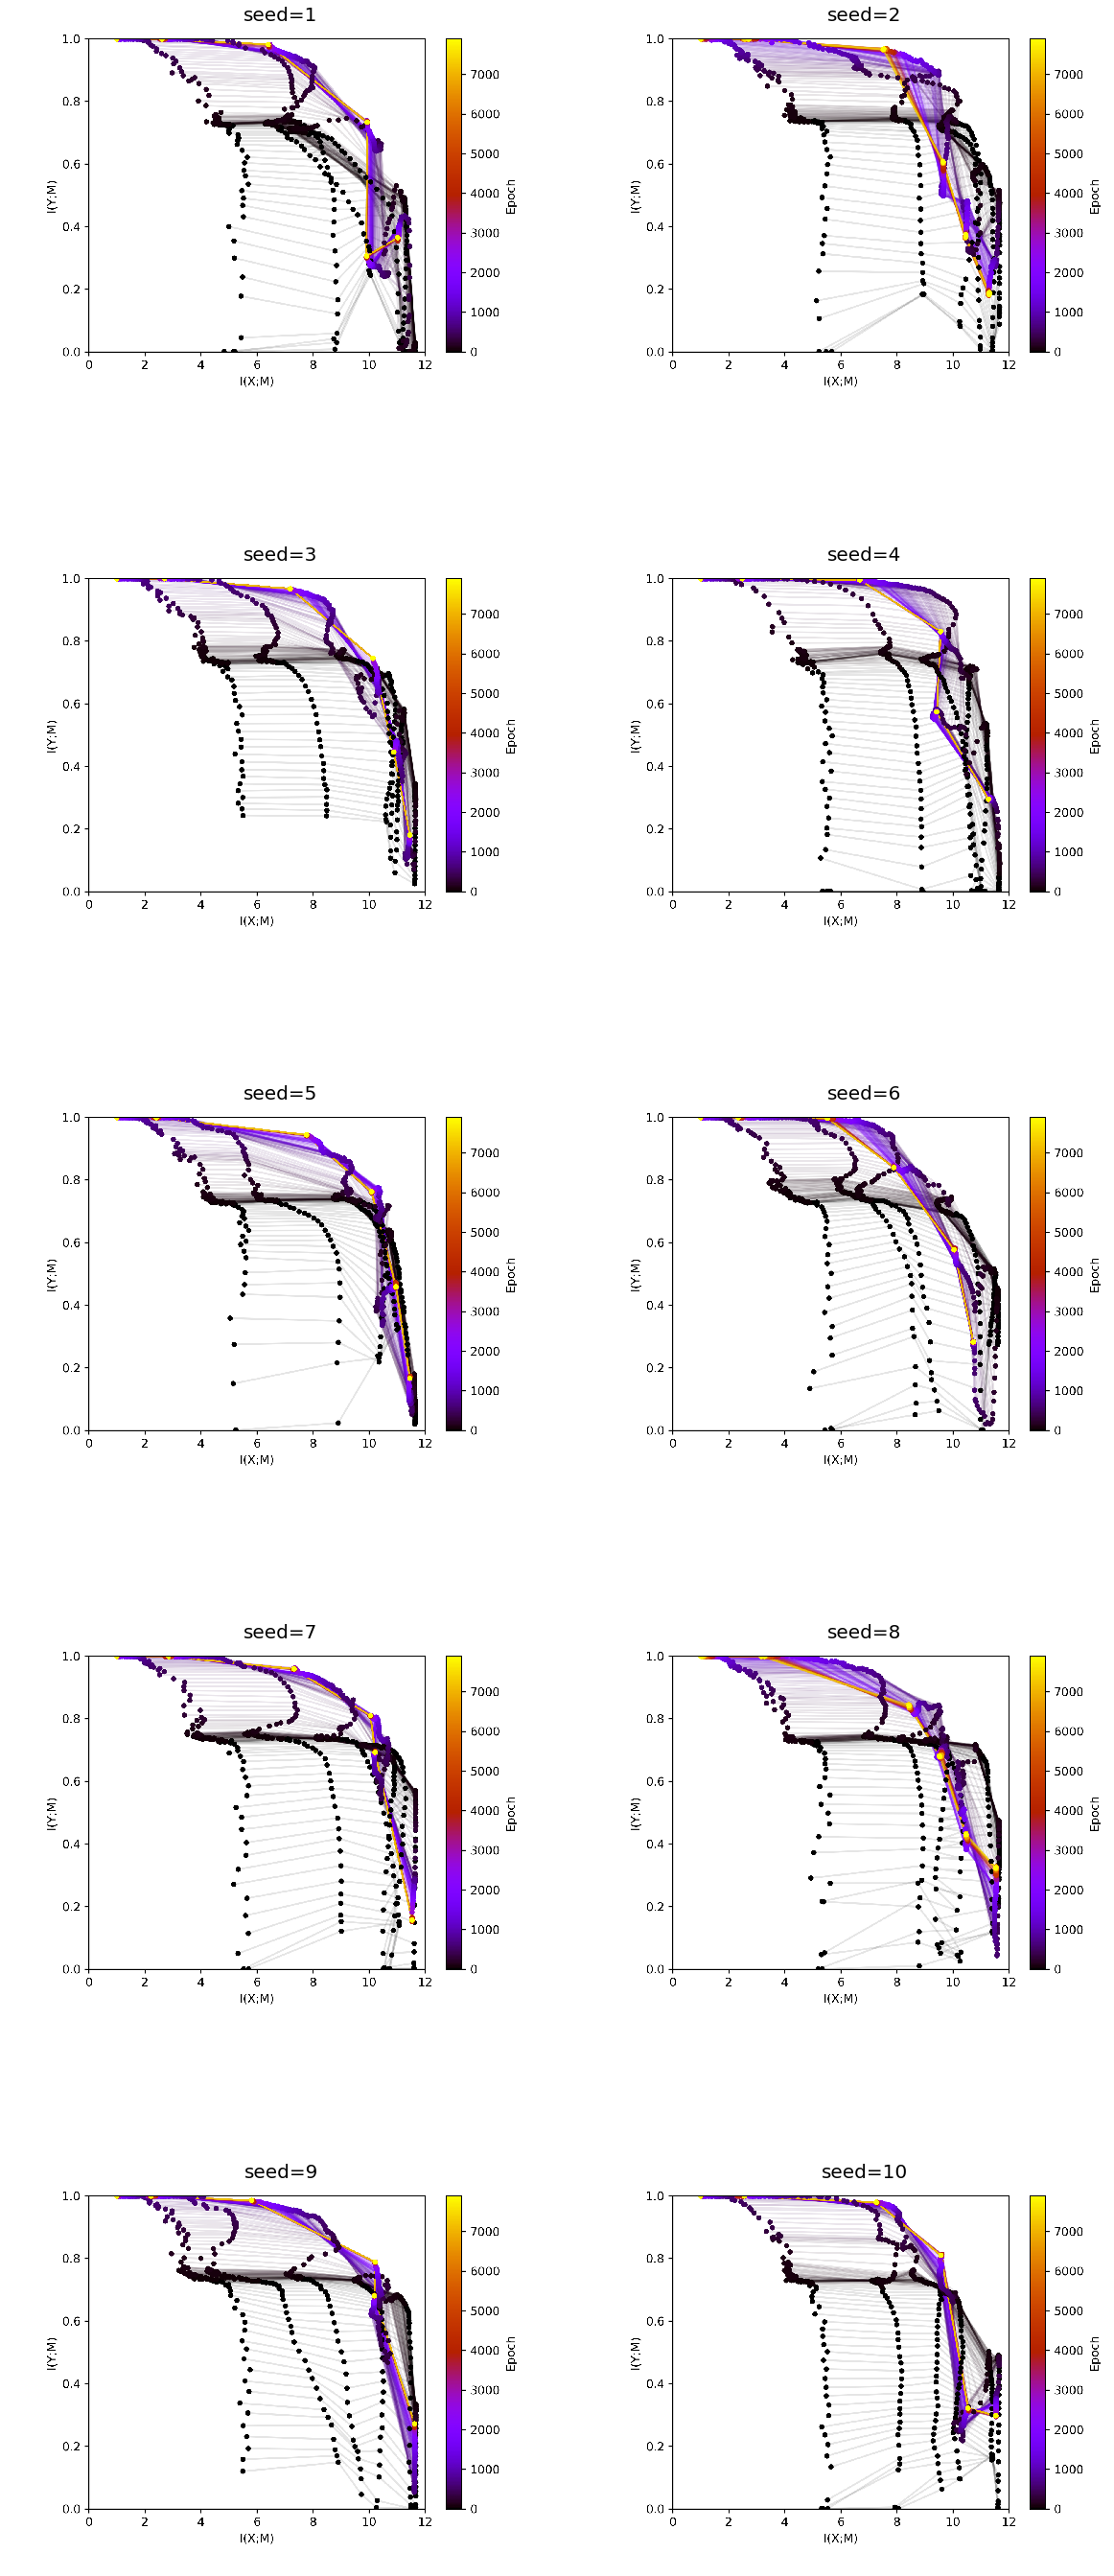

In [18]:
plt.show()

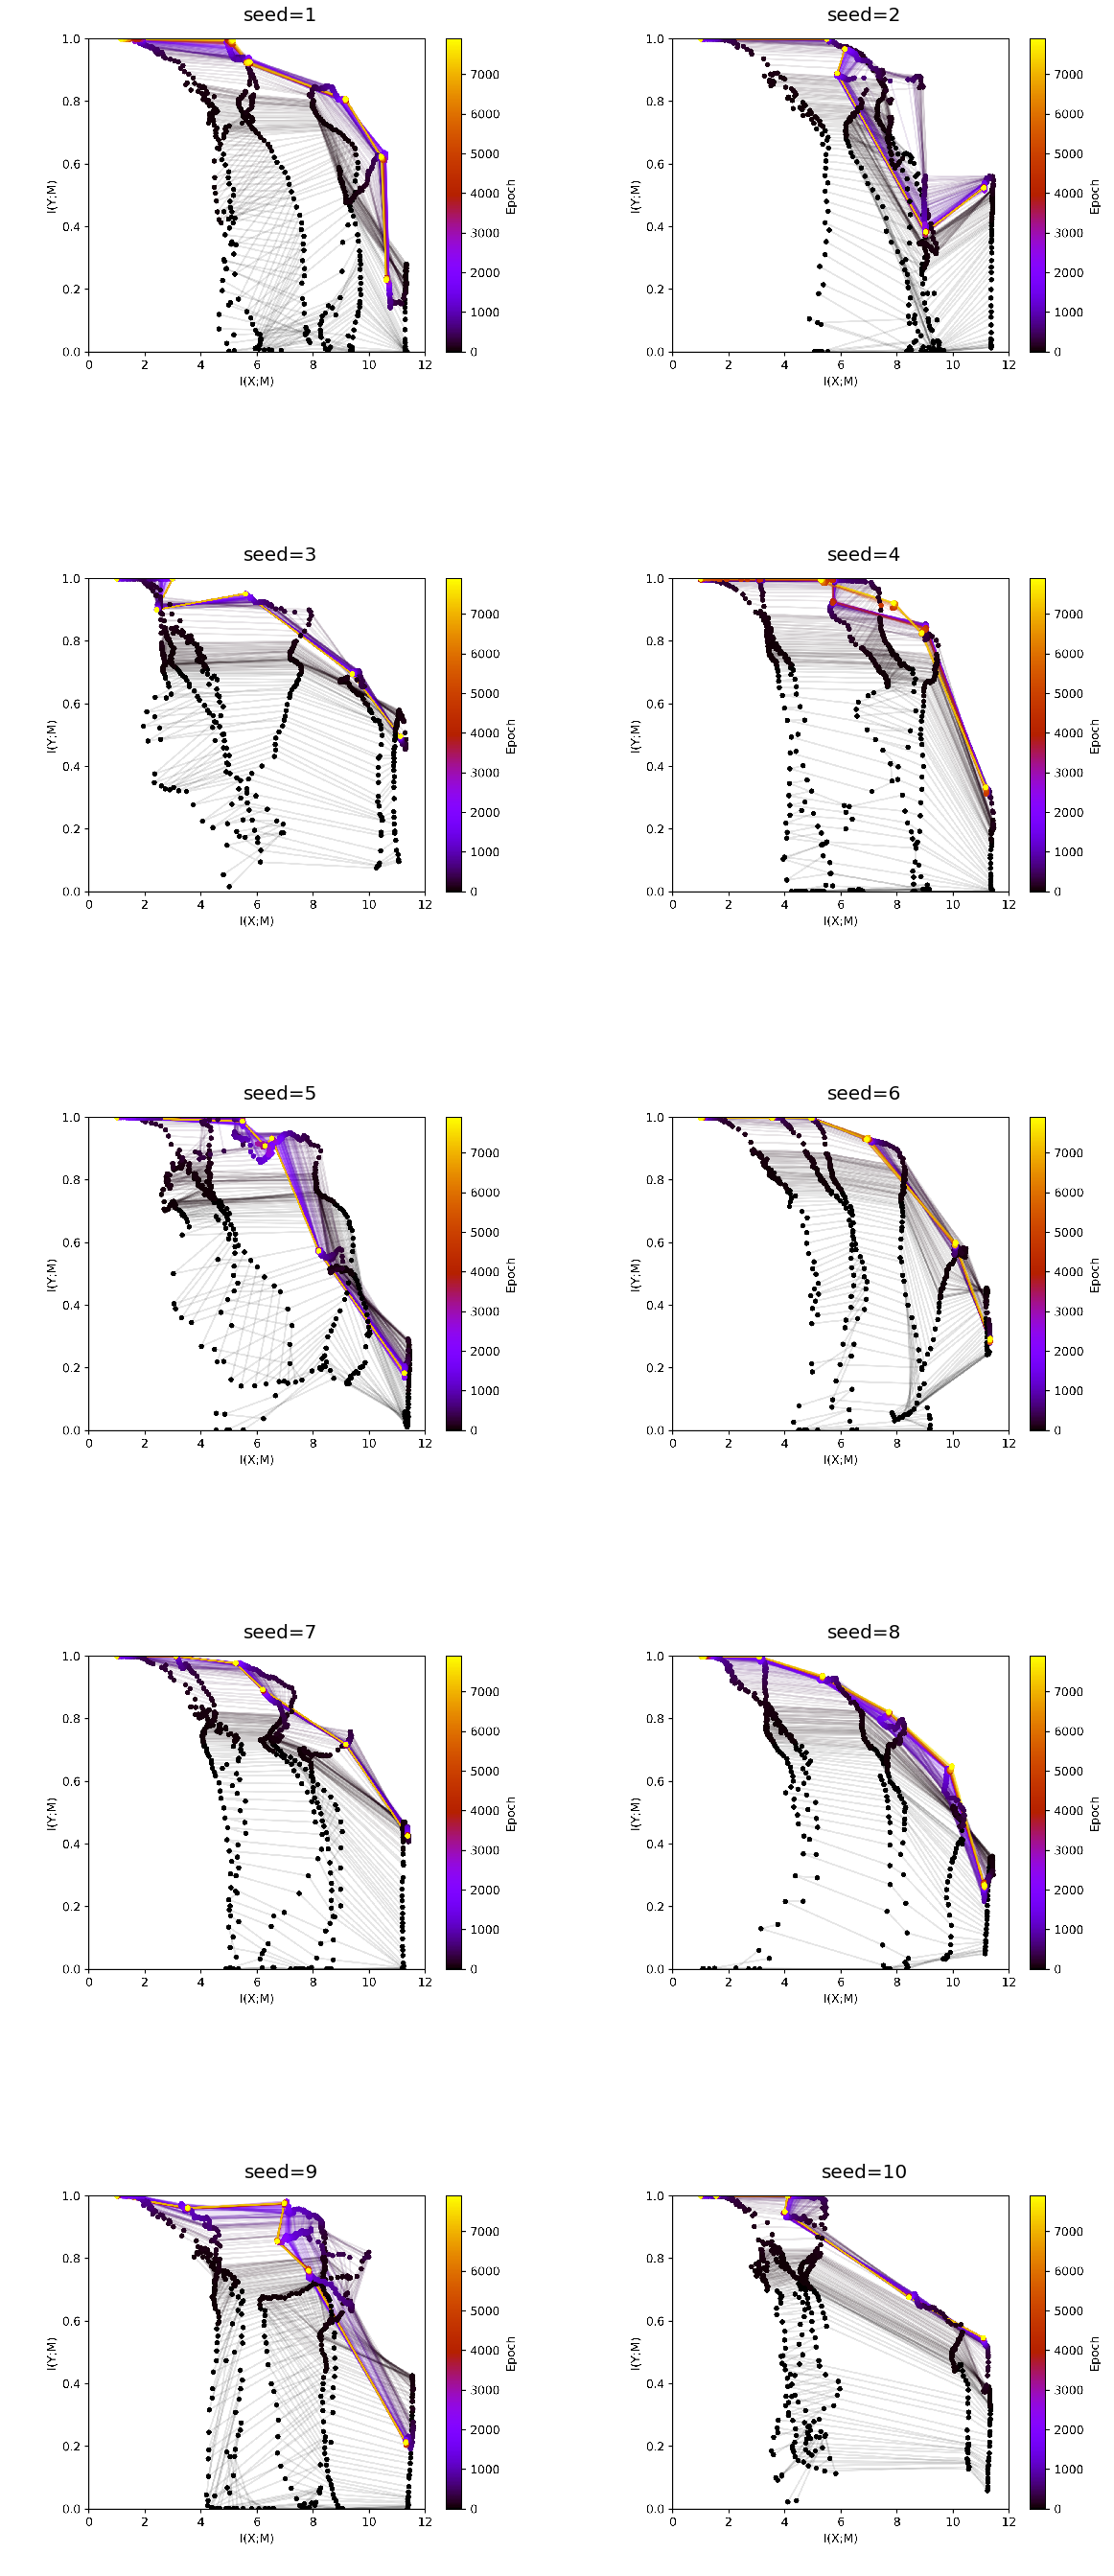

In [19]:
fig, ax = plt.subplots(5,2, figsize = (20,50))
ax = ax.flat
experiment_ids = [1314,1339,1336,1338,1337,1335,1340,1341,1342,1343]

experiments = loader.find_by_ids(experiment_ids)
differing_config_keys = find_differing_config_keys(experiments)

for i, experiment in enumerate(experiments):
    img = plt.imread(BytesIO(experiment.artifacts['infoplane_train'].content))
    ax[i].axis('off')
    ax[i].imshow(img)
    ax[i].set_title(format_config(experiment.config, *differing_config_keys),
                    fontsize=20)
    
    
plt.show()